# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): Random Forest
### <center>Predict whether income exceeds $50K/yr based on census data.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import accuracy_score, balanced_accuracy_score, plot_confusion_matrix

# Leer CSV

In [0]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

--2020-02-04 15:42:31--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818789 (3.6M) [text/plain]
Saving to: ‘./../data/adult.csv’

adult.csv           100%[===================>]   3.64M  --.-KB/s    in 0.06s   

2020-02-04 15:42:36 (58.7 MB/s) - ‘./../data/adult.csv’ saved [3818789/3818789]



In [0]:
df = pd.read_csv("../data/adult.csv")

In [0]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


# Qué queremos predecir? -> `df.Salary`

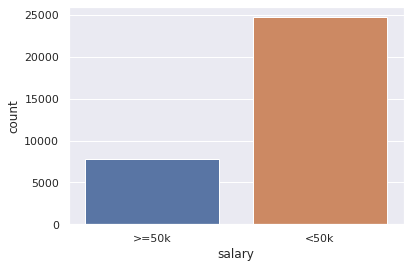

In [0]:
sns.countplot(df.salary);

# <center> Pre-processing
- Replace categories with their numeric codes
- handle missing continuous values
- Select target variable
- Split train and validation sets

# Missings

In [0]:
df = df.dropna(axis='rows')

# Categories

In [0]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'salary']

Date/time features:
 []


In [0]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,44,4,236746,12,14.0,0,4,1,4,1,10520,0,45,39,1
3,38,5,112847,14,15.0,2,10,0,1,1,0,0,40,39,1
5,20,4,63210,11,9.0,4,6,3,4,1,0,0,15,39,0
8,46,4,328216,11,9.0,2,3,0,4,1,0,0,40,39,1
21,26,4,746432,11,9.0,4,6,3,2,1,0,0,48,39,0


# Train (80%) and validation (20%)

In [0]:
x = df.drop("salary", axis="columns")
y = df["salary"]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

# Train Random Forest

In [0]:
# Estamos ante un problema de clasificación: cobra mucho o no.
# Si quisiera estimar cuanto cobra, sería un problema de regresión.
# n_jobs=-1: coja todas las CPUs de la máquina
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

# Use Random Forest to prect new data

In [0]:
preds = forest.predict(x_valid)
preds

array([1, 0, 0, ..., 0, 0, 1])

# Metrics

Accuracy (Caution): 86.34292000628633
Balanced accuracy:  78.23147985030405


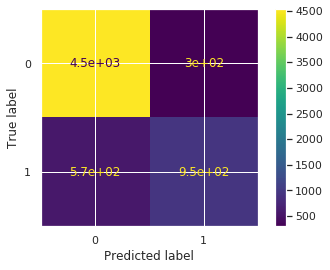

In [0]:
print("Accuracy (Caution):", accuracy_score(y_valid, preds)*100)
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds)*100)
plot_confusion_matrix(forest, x_valid, y_valid);

# Feature importance

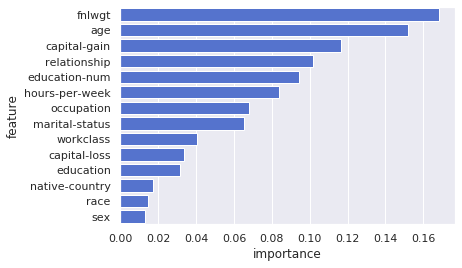

In [17]:
fi = pd.DataFrame({
      'feature':     x.columns,
      'importance':  forest.feature_importances_
     }).sort_values('importance', ascending=False).reset_index(drop=True)

sns.barplot(x=fi.importance, y=fi.feature, color='royalblue');